In [1]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import math


In [2]:
def LZS_Ham(Ad, detuning, tunnel, vd, maxm):
    ## 实验参数区 单位：GHz
    h=1;#Planck constant 
    gamma=0.1;#decoherence rate of qubit
    vr=5.198;#resonator frequency
    vprobe=vr;#probe frequency
    alpha=0.001;#dimensionless dissipation strength
    T = 0.1
    g=0.081;#couple strength between qubit and cavity
    kbT = 86.17333262145/4.1356676969 * T;#GHz #k_b*10mK #86.17333262145 ueV h = 4.1356676969×10-15 eV·s
    ## Floquet计算参数区
    dima = 2;# atom系统的维度=2(固定，更改需一并修改H0定义)
    maxm = maxm;# floquet张开的最大光子数值
    pi = math.pi
    ## 额外参数区
    kappa = 0.01197
    kappaext = 0.007
    kappaint = kappa - kappaext  
    H0 = tunnel/2 * sigmax() + detuning / 2 * sigmaz()
    N = 2 * maxm + 1
    idf = identity(N)
    mhat = tensor(qdiags(range(-maxm,maxm+1),0),identity(dima))
    mhatin = Qobj(np.diag(np.ones(2*maxm,dtype=np.float64),-1))
    mhatde = Qobj(np.diag(np.ones(2*maxm,dtype=np.float64),1))
    mhatin = tensor(mhatin, identity(dima))
    mhatde = tensor(mhatde, identity(dima))
    H0 = tensor(idf,H0)
    sigmazt = tensor(identity(N),sigmaz())
    sigmaxt = tensor(identity(N),sigmax())
    Hf = H0 + h * vd * mhat - Ad / 4 * sigmazt * (mhatin + mhatde)
    return Hf

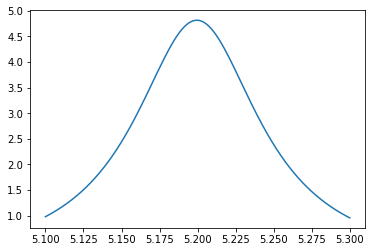

In [34]:
tunnel = 5.2
vd = 3.4
wc=5.2
g = 0.08
maxm = 2
N = 2 * maxm + 1
Nc = 5
dima = 2

#

ad = create(Nc)
ad = tensor(identity(N),identity(2),ad)
# get hamitonian
Ad=0
detuning=0
Hc = wc*ad*ad.dag()
H = LZS_Ham(Ad=Ad, detuning=detuning, tunnel=tunnel, vd=vd, maxm=maxm)
H = tensor(H,identity(Nc))

sm_all = tensor(qeye(N),sigmam(),qeye(Nc))
Hi = 1*g*(ad*sm_all+ad.dag()*sm_all.dag())
psi0 = tensor(fock(N,0),fock(dima,1),fock(Nc,0))
# tlist = np.linspace(0,10,1000)
sigmazt = tensor(identity(N),sigmaz(),identity(Nc))

H = H + Hc + Hi
# res = mesolve(H,psi0,tlist,[],[sigmazt],args=None)
probe_lis = np.linspace(5.1,5.3,1000)
c_ops = []
n_th = 0.1
kappa = 0.1
c_ops.append(np.sqrt((1+n_th)*kappa) * ad.dag())
c_ops.append(np.sqrt((n_th)*kappa) * ad)
c_ops.append(sm_all)
spec2 = spectrum(H,probe_lis,c_ops,ad,ad.dag())
# plt.plot(tlist,res.expect[0])d
plt.plot(probe_lis,spec2)

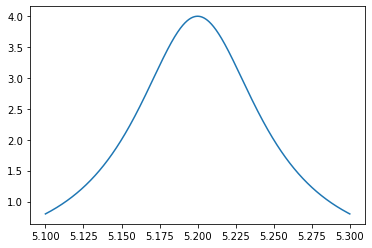

In [32]:
tunnel = 5.2
vd = 3.4
wc=5.2
g = 0.000002
maxm = 2
N = 2 * maxm + 1
Nc = 5
dima = 2

#

ad = create(Nc)
ad = tensor(identity(N),identity(2),ad)
# get hamitonian
Ad=0
detuning=10
Hc = wc*ad*ad.dag()
H = LZS_Ham(Ad=Ad, detuning=detuning, tunnel=tunnel, vd=vd, maxm=maxm)
H = tensor(H,identity(Nc))

sm_all = tensor(qeye(N),sigmam(),qeye(Nc))
Hi = 1*g*(ad*sm_all+ad.dag()*sm_all.dag())
psi0 = tensor(fock(N,0),fock(dima,0),fock(Nc,0))
# tlist = np.linspace(0,10,1000)
sigmazt = tensor(identity(N),sigmaz(),identity(Nc))

H = H + Hc + Hi
# res = mesolve(H,psi0,tlist,[],[sigmazt],args=None)
probe_lis = np.linspace(5.1,5.3,1000)
c_ops = []
n_th = 0.1
kappa = 0.1
c_ops.append(np.sqrt((1+n_th)*kappa) * ad.dag())
c_ops.append(np.sqrt((n_th)*kappa) * ad)
c_ops.append(sm_all)
spec2 = spectrum(H,probe_lis,c_ops,ad,ad.dag())
# plt.plot(tlist,res.expect[0])d
plt.plot(probe_lis,spec2)